In [1]:
import numpy as np

from prospect.specutils import Spectra
from prospect import viewer

from IPython.display import clear_output

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import rc
%matplotlib inline

from astropy.convolution import convolve, Gaussian1DKernel

import pickle
plt.rcParams['font.size'] = 14

In [2]:
with open("../DESI_LAE_dataset/iron_spectra.pkl", "rb") as fh:
    spectra = pickle.load(fh)

In [7]:
def inspector(spectra, save, mode):
    n = 0
    for i in spectra:
        n += 1
        if "VI" not in i:
            print(f"No.{n} / {len(spectra)}")
            flux = i["flux"]
            wavelength = i["wavelength"]
            redshift = i["redshift"]
            ivar = i["ivar"]
            targetid = i["specid"]
            
            if redshift > 1.96:
                vlines = np.array([1215.67, 1549, 1908, 2796]) * (redshift  + 1)
                #Lya, CIV, CIII, and MGII
                
            elif redshift < 0.4:
                vlines = np.array([3726.032, 3968.47, 4101.734, 4340, 4861, 5007, 4959, 6562.81]) * (redshift  + 1)
                #OII, HEPSILON, HDELTA, HGAMMA, HBETA, OIII, and HALPHA
            else:
                pass
                
            vlines = vlines[vlines < wavelength[-1]]
            vlines = vlines[vlines > wavelength[0]]
            
            w = wavelength
            f = flux
            iv = np.sqrt(ivar) ** -1

            plt.close()
            plt.rcParams['figure.figsize'] = (32,8)
            plt.title(f"target ID = {targetid}\n"
                      f"Redshift = {redshift}\n", loc = 'left')
            plt.xlabel('$\lambda\ [\AA]$')
            plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
            
            if mode == "divide":
                plt.plot(w, f / iv, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
                plt.plot(w, convolve(f / iv, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
                plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
                ymax = np.max(f / iv)
                ymin = np.min(f / iv)
                plt.xlim(3500, 9900)
                plt.ylim(ymin, ymax)                
            else:
                plt.plot(w, f, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
                plt.plot(w, convolve(f, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
                plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
                ymax = np.std(f, ddof = 1) * 7
                ymin = -np.std(f, ddof = 1) * 7
                plt.xlim(3500, 9900)
                plt.ylim(ymin, ymax)
                
            for j in vlines:
                plt.vlines(x = j, ymin = ymin, ymax = ymax, color = "b", linestyles = "dashed", lw = 1)
            
            plt.legend()
            plt.show()
            
            if redshift < 0.4:
                min = 3726.032 * (redshift + 1) - 50
                max = 3726.032 * (redshift + 1) + 50
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
                
            elif redshift > 1.96:
                min = 1215.67 * (redshift + 1) - 50
                max = 1215.67 * (redshift + 1) + 50
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
            
            print("Is it a LAE?")
            print(f"https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid{targetid}")
            again = True
            exit = False
            while again:
                try:
                    answer1 = input("-1:ignore / 0:NLAE / 1:LAE / 2:Exit / 3:Bad")
                    answer2 = int(answer1)
                    if answer2 == 2:
                        exit = True
                        break
                    else:
                        pass
                    i["VI"] = answer2
                    again = False
                    clear_output()
                except:
                    print("Only -1, 0, 1, 2, and 3 are legal!")
                    
            if exit == True:
                break
            else:
                pass
            if n % 5 == 0:
                with open(str(save) + "iron_spectra.pkl", "wb") as fh:
                    pickle.dump(spectra, fh)
                print("Haved been saved to the pkl file!")
            else:
                pass
            print("===============================================================================================================================")
        else:
            pass
    return spectra

In [8]:
def double_check(spectra, save, mode):
    for i in spectra:
        if i["VI"] == -1:
            flux = i["flux"]
            wavelength = i["wavelength"]
            redshift = i["redshift"]
            ivar = i["ivar"]
            targetid = i["specid"]
            
            if redshift > 1.96:
                vlines = np.array([1215.67, 1549, 1908, 2796]) * (redshift  + 1)
                #Lya, CIV, CIII, and MGII
                
            elif redshift < 0.4:
                vlines = np.array([3726.032, 3968.47, 4101.734, 4340, 4861, 6562.81]) * (redshift  + 1)
                #OII, HEPSILON, HDELTA, HGAMMA, HBETA, and HALPHA
            else:
                pass
                
            vlines = vlines[vlines < wavelength[-1]]
            vlines = vlines[vlines > wavelength[0]]
            
            w = wavelength
            f = flux
            iv = np.sqrt(ivar) ** -1

            plt.close()
            plt.rcParams['figure.figsize'] = (32,8)
            plt.title(f"target ID = {targetid}\n"
                      f"Redshift = {redshift}\n", loc = 'left')
            plt.xlabel('$\lambda\ [\AA]$')
            plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
            
            if mode == "divide":
                plt.plot(w, f / iv, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
                plt.plot(w, convolve(f / iv, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
                plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
                ymax = np.max(f / iv)
                ymin = np.min(f / iv)
                plt.xlim(3500, 9900)
                plt.ylim(ymin, ymax)                
            else:
                plt.plot(w, f, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
                plt.plot(w, convolve(f, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
                plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
                ymax = np.std(f, ddof = 1) * 7
                ymin = -np.std(f, ddof = 1) * 7
                plt.xlim(3500, 9900)
                plt.ylim(ymin, ymax)
                
            for j in vlines:
                plt.vlines(x = j, ymin = ymin, ymax = ymax, color = "b", linestyles = "dashed", lw = 1)
            
            plt.legend()
            plt.show()
            
            if redshift < 0.4:
                min = 3726.032 * (redshift + 1) - 50
                max = 3726.032 * (redshift + 1) + 50
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
                
            elif redshift > 1.96:
                min = 1215.67 * (redshift + 1) - 50
                max = 1215.67 * (redshift + 1) + 50
                mask_min = wavelength > min
                mask_max = wavelength < max
                w = wavelength[mask_min & mask_max]
                f = flux[mask_min & mask_max]
                iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

                if np.max(f) == np.inf:
                    f[np.where(f == np.inf)] = np.median(f)
                elif np.max(iv) == np.inf:
                    iv[np.where(iv == np.inf)] = np.median(iv)
                else:
                    pass
                
                plt.rcParams['figure.figsize'] = (8,6)
                plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
                plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
                plt.legend()
                plt.show()
            
            print("Is it a LAE?")
            print(f"https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid{targetid}")
            again = True
            exit = False
            while again:
                try:
                    answer1 = input("-1:ignore / 0:NLAE / 1:LAE / 2:Exit")
                    answer2 = int(answer1)
                    if answer2 == 2:
                        exit = True
                        break
                    else:
                        pass
                    i["VI"] = answer2
                    again = False
                    with open(str(save) + "iron_spectra.pkl", "wb") as fh:
                        pickle.dump(spectra, fh)
                    clear_output()
                except:
                    print("Only -1, 0, 1, 2 are legal!")
                    
            if exit == True:
                break
            else:
                pass
            print("===============================================================================================================================")
        else:
            pass
    return spectra

In [5]:
n1 = 0
n2 = 0
n3 = 0
for i in spectra:
    if "VI" in i:
        if i["VI"] == -1:
            n1 += 1
        elif i["VI"] == 0:
            n2 += 1
        elif i["VI"] == 1:
            n3 += 1
        else:
            pass
print(f"Check:{n1}, NLAE:{n2}, LAE:{n3}")

Check:69, NLAE:389, LAE:1204


Haved been saved to the pkl file!
No.686 / 5126


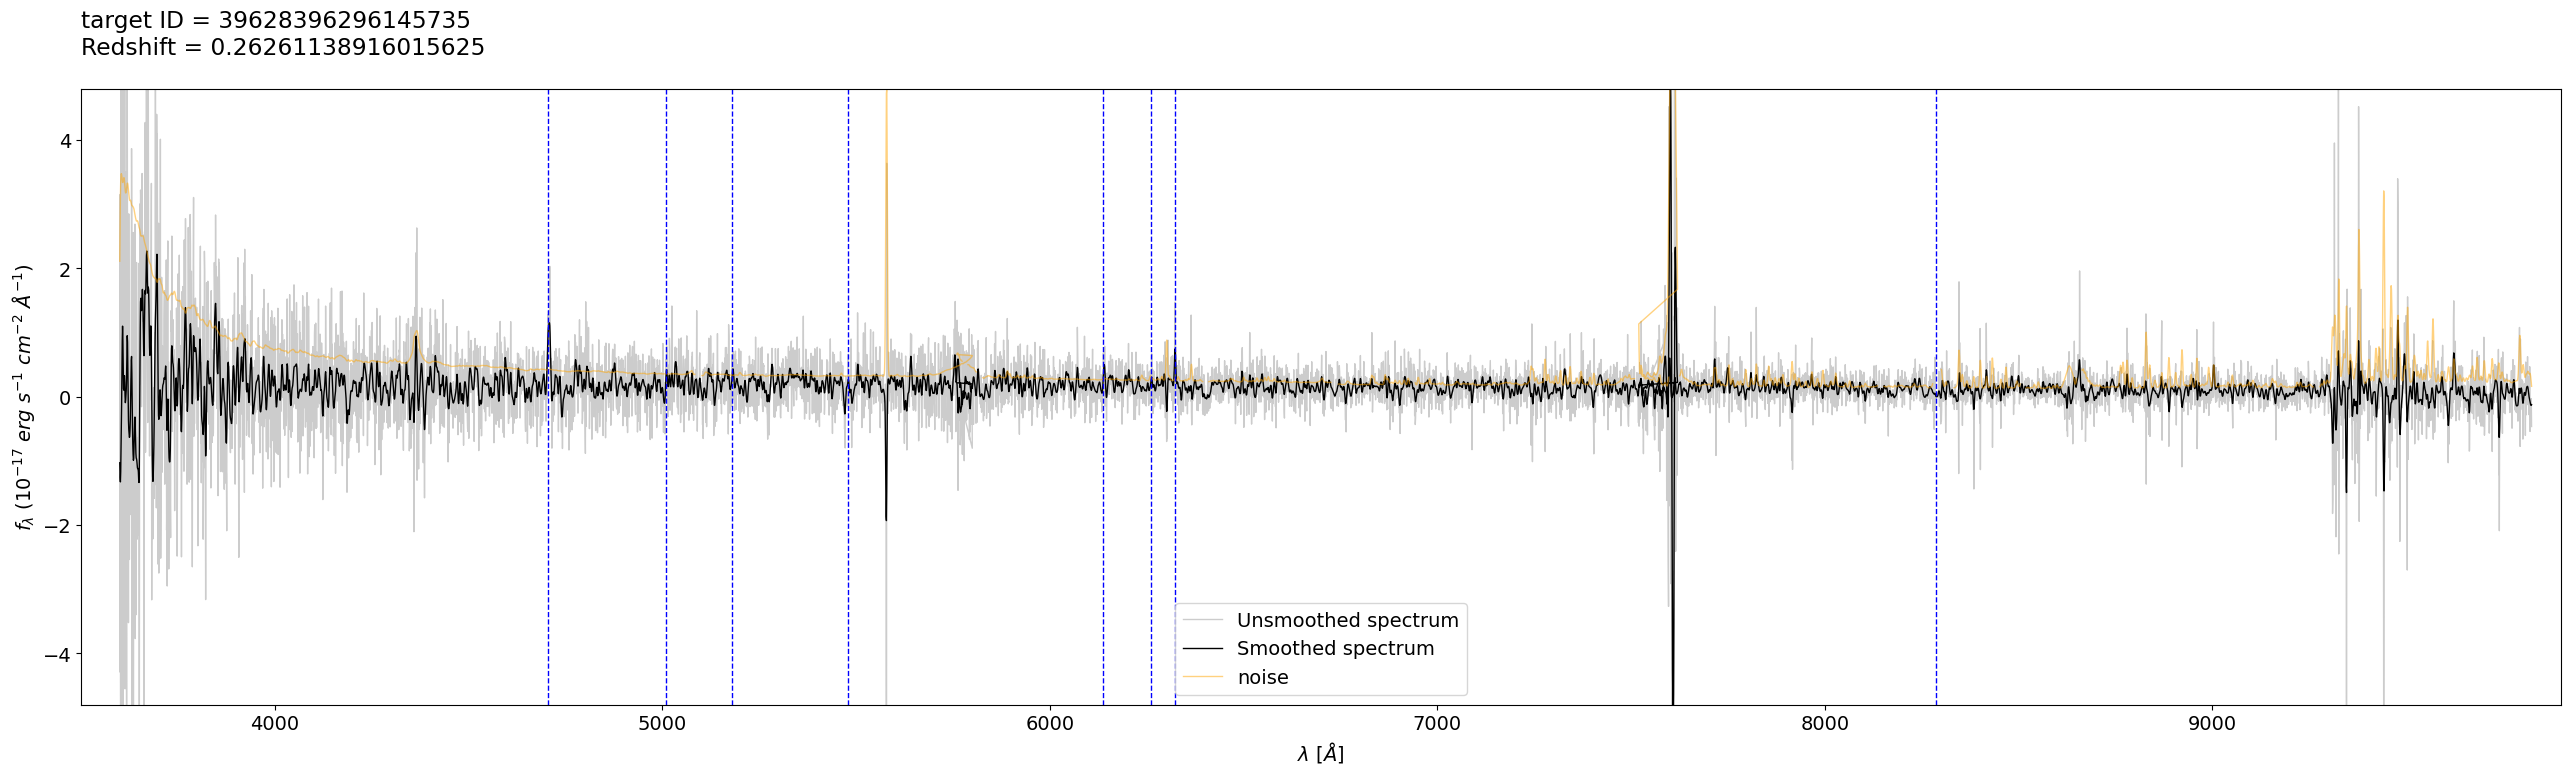

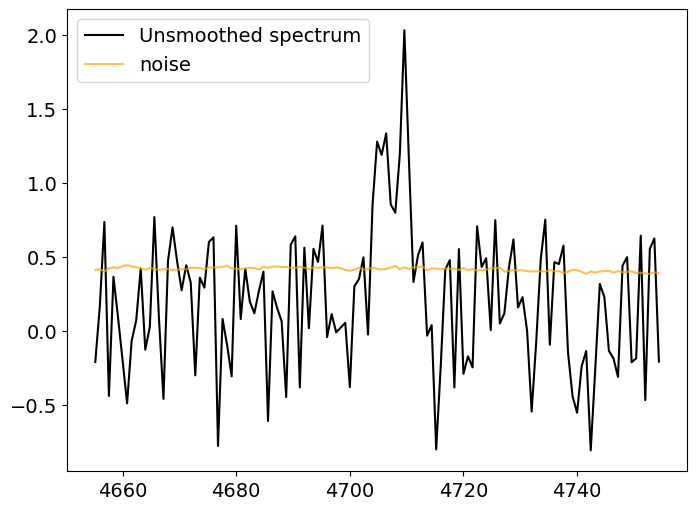

Is it a LAE?
https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid39628396296145735


In [ ]:
spectra = inspector(spectra = spectra, save = "../DESI_LAE_dataset/", mode ="normal")

In [ ]:
spectra = double_check(spectra = spectra, save = "../DESI_LAE_dataset/", mode = "normal")

In [2]:
with open("../DESI_LAE_dataset/iron_spectra_mask.pkl", "rb") as fh:
    spectra = pickle.load(fh)

In [18]:
def prospect_VI(spectra, html_dir):
    wavelength = []
    flux = []
    ivar = []
    mask = []
    redrock_z = []
    n = 0
    for i in spectra:
        n += 1
        wavelength.append(i["wavelength1"])
        flux.append(i["flux"])
        ivar.append(i["ivar"])
        mask.append(i["bitmask"])
        redrock_z.append(i["redshift"])
        if n % 10 == 0:
            wavelength = np.array(wavelength)[0]
            flux = np.array(flux)
            ivar = np.array(ivar)
            mask = np.array(mask, dtype = np.int64)
            redrock_z = np.array(redrock_z)
            spectra_obj = Spectra(bands = ["brz"], wave = {"brz": wave1
                                                           length}, flux = {"brz": flux}, ivar = {"brz": ivar}, mask = {"brz": mask})
            a = viewer.plotspectra(spectra = spectra_obj, html_dir = html_dir)
            break
    return a

In [ ]:
a = prospect_VI(spectra = spectra, html_dir = "../DESI_LAE_dataset/")

In [ ]:
for i in range(0, len(spectra[0]["wavelength"]) - 1):
    if spectra[0]["wavelength"][i] > spectra[0]["wavelength"][i + 1]:
        print(spectra[0]["wavelength"][i])
        print(spectra[0]["wavelength"][i + 1])